In [23]:
import numpy as np
from os import listdir
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle

import keras.models as models
from keras.layers.core import Layer, Dense, Dropout, Activation, Flatten, Reshape, Permute
from keras.layers.convolutional import Convolution2D, MaxPooling2D, UpSampling2D, ZeroPadding2D, Deconvolution2D
from keras.layers.normalization import BatchNormalization
from keras.layers.wrappers import TimeDistributed
from keras.layers import Merge

from models_v1 import *

%matplotlib inline

## Utility functions and global variables

In [2]:
train_path = '../Data/inpainting/train2014/'
val_path = '../Data/inpainting/val2014/'

In [3]:
# Utility function for loading data
def load_data(path, filenames, nb_images=None):
    if nb_images == None:
        nb_images == len(filenames)

    images_list = [mpimg.imread(path + fn).transpose(2, 0, 1) for fn in filenames[0:nb_images]]

    return np.array(images_list)

In [4]:
# Load data

# Train images
# Load valid train images filenames
with open("./Data/train_images_fn.pkl", 'rb') as input:
    train_fn = pickle.load(input)

# Load python dict containing channel-wise means and stds
with open("./Data/train_meanStd_dict.pkl", 'rb') as input:
    train_meanStd_dict = pickle.load(input, encoding='latin1')

x_train = load_data(train_path, train_fn, 10)
y_train = x_train[:, :, 16:48, 16:48].copy()  

# Validation images    
# Load valid validation images filenames
with open("./Data/val_images_fn.pkl", 'rb') as input:
    val_fn = pickle.load(input)

# Load python dict containing channel-wise means and stds
with open("./Data/val_meanStd_dict.pkl", 'rb') as input:
    val_meanStd_dict = pickle.load(input, encoding='latin1')
    
x_val = load_data(val_path, val_fn, 10)
y_val = x_val[:, :, 16:48, 16:48].copy()

# Display 1 image
x_train[0].reshape((64,64,3))
plt.imshow(x_train[0].transpose(1, 2, 0))

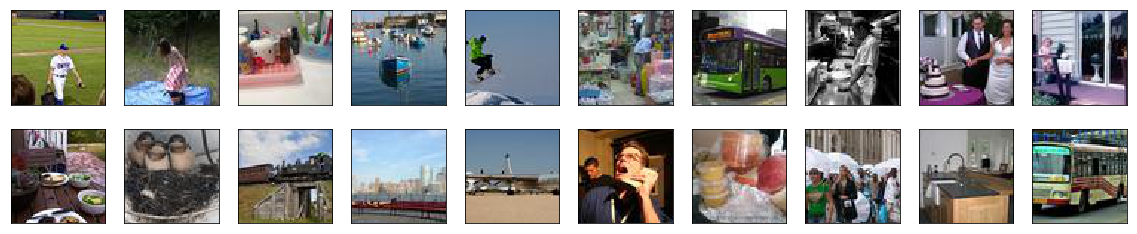

In [6]:
#Show reconstruction results on 10 images from training and validation
n = 10

plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i].transpose(1, 2, 0))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_val[i].transpose(1, 2, 0))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Visualization

## Results visualization

### Models v1

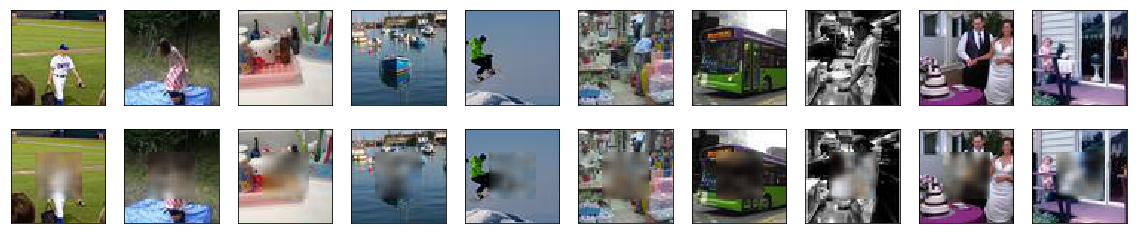

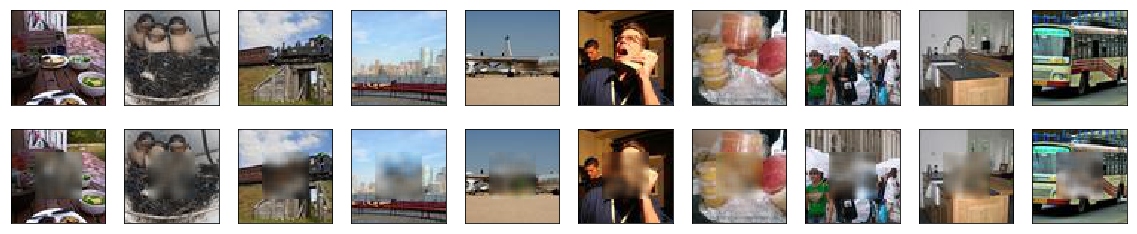

In [20]:
# Show reconstruction results on 10 images from training and validation
n = 10

# Predict train and validation images centers
model = model_v10()
model.load_weights("./Results/Models_v1/convautoencoder_v10.h5")

im_train = x_train[0:n].copy()/255.0
im_train[:, :, 16:48, 16:48] = 0.0
im_train[:, :, 16:48, 16:48] = model.predict(im_train)
im_train = (im_train * 255.0).astype('uint8')

im_val = x_val[0:n].copy()/255.0
im_val[:, :, 16:48, 16:48] = 0.0
im_val[:, :, 16:48, 16:48] = model.predict(im_val)
im_val = (im_val * 255.0).astype('uint8')

# Predict outputs of train and validation images
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i].transpose(1, 2, 0))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(im_train[i].transpose(1, 2, 0))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_val[i].transpose(1, 2, 0))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(im_val[i].transpose(1, 2, 0))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

## Training curves visualization

### Models v0

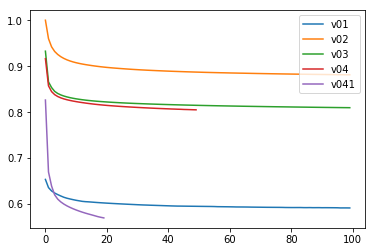

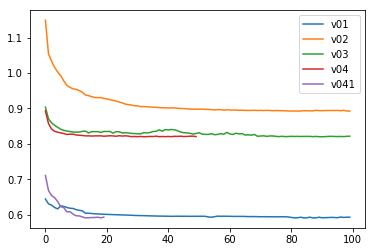

In [81]:
with open("./Results/Models_v0/convautoencoder_v01_trainHistory.pkl", 'rb') as input:
    train_results_v01 = pickle.load(input, encoding='latin1')
    
with open("./Results/Models_v0/convautoencoder_v02_trainHistory.pkl", 'rb') as input:
    train_results_v02 = pickle.load(input, encoding='latin1')
    
with open("./Results/Models_v0/convautoencoder_v03_trainHistory.pkl", 'rb') as input:
    train_results_v03 = pickle.load(input, encoding='latin1')
    
with open("./Results/Models_v0/convautoencoder_v04_trainHistory.pkl", 'rb') as input:
    train_results_v04 = pickle.load(input, encoding='latin1')
    
with open("./Results/Models_v0/convautoencoder_v041_trainHistory.pkl", 'rb') as input:
    train_results_v041 = pickle.load(input, encoding='latin1')
    
plt.figure()
plt.plot(train_results_v01['loss'], label="v01")
plt.plot(train_results_v02['loss'], label="v02")
plt.plot(train_results_v03['loss'], label="v03")
plt.plot(train_results_v04['loss'], label="v04")
plt.plot(train_results_v041['loss'], label="v041")
plt.legend()

plt.figure()
plt.plot(train_results_v01['val_loss'], label="v01")
plt.plot(train_results_v02['val_loss'], label="v02")
plt.plot(train_results_v03['val_loss'], label="v03")
plt.plot(train_results_v04['val_loss'], label="v04")
plt.plot(train_results_v041['val_loss'], label="v041")
plt.legend()

### Models v1

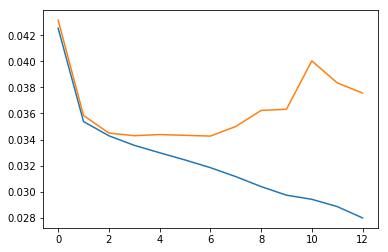

In [22]:
with open("./Results/Models_v1/convautoencoder_v10_trainHistory.pkl", 'rb') as input:
    train_results_v10 = pickle.load(input, encoding='latin1')
    
plt.figure()
plt.plot(train_results_v10['loss'], label="v10 : train")
plt.plot(train_results_v10['val_loss'], label="v10 : val")
